# DETECTING FRAUD WITH ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [2]:
df1 = pd.read_csv('Fraud_Data.csv')

In [3]:
ip_country = pd.read_csv('IpAddress_to_Country.csv')

In [4]:
def transform_ip(arg) :
    try :
        return ip_country.country[(ip_country.lower_bound_ip_address < arg) & (ip_country.upper_bound_ip_address > arg)].iloc[0]
    except IndexError :
        return "Pays inconnu"  

'''
list1=ip['lower_bound_ip_address'].tolist()
list2=ip['upper_bound_ip_address'].tolist()
list3=ip['country'].tolist()

for l,u,c in zip(list1,list2,list3):
    fraud.loc[((fraud['ip_address']>l) & (fraud['ip_address']<u)),'country']=c
'''  

df1["country_name"] = df1.ip_address.apply(transform_ip)

In [5]:
df1.to_csv('result.csv')

In [6]:
df1= pd.read_csv('result.csv')

In [7]:
df1.shape

(151112, 13)

In [8]:
df1.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [9]:
df1 = df1.iloc[:, 1:]
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


# Exploring the data

## Date/time processing

In [10]:
df1.signup_time = pd.to_datetime(df1.signup_time, format ="%Y-%m-%d %H:%M:%S")
df1.purchase_time = pd.to_datetime(df1.purchase_time, format ="%Y-%m-%d %H:%M:%S")
df1["time_delta"] = (df1.purchase_time - df1.signup_time)/np.timedelta64(1, 's')

In [11]:
df1.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country_name', 'time_delta'],
      dtype='object')

In [12]:
df1 = df1.rename(columns={"class": "y", "x": "country_name"})
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,y,country_name,time_delta
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0


## Data visualization

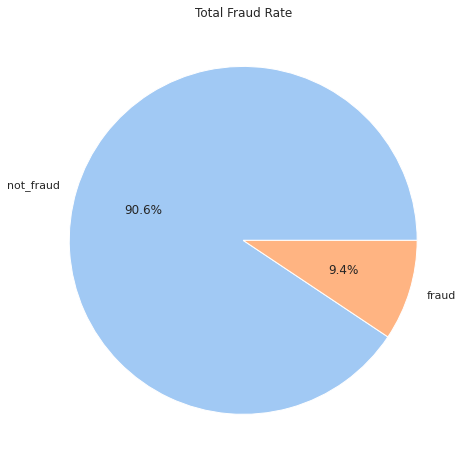

In [13]:
sns.set(style="ticks", palette="pastel")

### TOTAL FRAUD RATE ###
fig = plt.figure(figsize=(15,8))
not_fraud = df1[df1.y == 0].y.value_counts()
fraud = df1[df1.y == 1].y.value_counts()

labels = ['not_fraud','fraud']

fraud_pie = np.concatenate((not_fraud, fraud), axis=0)

plt.pie(fraud_pie, labels=labels, autopct='%1.1f%%')
plt.title("Total Fraud Rate")
plt.show()

In [14]:
# Fraudulent countries
fraud_country = df1[['country_name', 'y']].groupby(['country_name', 'y']).size().sort_values(ascending=False).unstack().fillna(0)

display(fraud_country)

y,0,1
country_name,,
Afghanistan,5.0,1.0
Albania,13.0,0.0
Algeria,109.0,13.0
Angola,23.0,1.0
Antigua and Barbuda,3.0,0.0
...,...,...
Viet Nam,513.0,37.0
Virgin Islands (U.S.),2.0,1.0
Yemen,1.0,0.0


In [15]:
# rate of fraud
fraud_country['total_purchases_per_country'] = fraud_country.iloc[:,:].sum(axis=1)

fraud_country['%_Fraud_Country'] = round(fraud_country.iloc[:, -2]/fraud_country.iloc[:,-1]*100,2)
fraud_country = fraud_country.sort_values('%_Fraud_Country', ascending=False) 
fraud_country.describe()

y,0,1,total_purchases_per_country,%_Fraud_Country
count,182.000000,182.000000,182.000000,182.000000
mean,752.532967,77.752747,830.285714,7.175220
std,4274.246191,444.884179,4718.564368,10.671057
min,0.000000,0.000000,1.000000,0.000000
25%,5.000000,0.000000,5.250000,0.000000
50%,23.500000,2.000000,25.000000,5.190000
75%,210.250000,28.000000,236.250000,9.777500
max,52498.000000,5551.000000,58049.000000,100.000000


In [16]:
print("There are {} countries for registered transactions.".format(len(fraud_country['total_purchases_per_country'])))
print("There are {} countries where there are no fraudulent cases.".format(fraud_country['%_Fraud_Country'][fraud_country['%_Fraud_Country'] == 0].count()))


There are 182 countries for registered transactions.
There are 72 countries where there are no fraudulent cases.


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


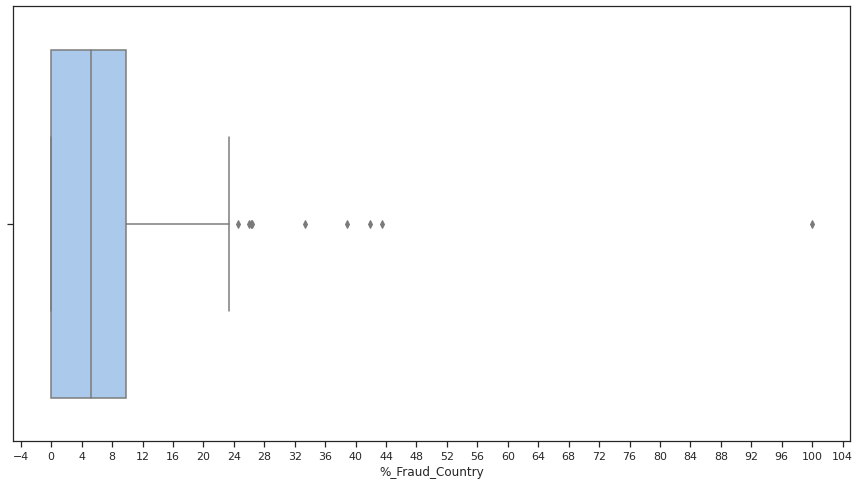

In [17]:
fig = plt.figure(figsize=(15,8))
fig = sns.boxplot(fraud_country['%_Fraud_Country'])
fig.xaxis.set_major_locator(plt.MaxNLocator(30))
# percentage of fraud distributed by the countries 

In [18]:
# main pointwise descriptive statistics of fraud level per country


median = np.median(fraud_country['%_Fraud_Country'])
upper_quartile = np.percentile(fraud_country['%_Fraud_Country'], 75)
lower_quartile = np.percentile(fraud_country['%_Fraud_Country'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = fraud_country['%_Fraud_Country'][fraud_country['%_Fraud_Country']<=upper_quartile+1.5*iqr].max()
lower_whisker = fraud_country['%_Fraud_Country'][fraud_country['%_Fraud_Country']>=lower_quartile-1.5*iqr].min()

print (lower_whisker, lower_quartile, round(median,2), round(upper_quartile,2), upper_whisker)

0.0 0.0 5.19 9.78 23.33


In [19]:
X2 = pd.DataFrame(fraud_country)
X2.reset_index('country_name')
X2['country'] = X2.index
X2['country_cat'] = fraud_country['%_Fraud_Country'].apply(lambda x: 0 if x == 0
                                                                     else 5 if x <= 5.19
                                                                     else 9 if x <= 9.77
                                                                     else 23 if x <= 23.33
                                                                     else 100)
X2.head()

y,0,1,total_purchases_per_country,%_Fraud_Country,country,country_cat
country_name,,,,,,
Turkmenistan,0.0,1.0,1.0,100.00,Turkmenistan,100
Namibia,13.0,10.0,23.0,43.48,Namibia,100
Sri Lanka,18.0,13.0,31.0,41.94,Sri Lanka,100
Luxembourg,44.0,28.0,72.0,38.89,Luxembourg,100
Virgin Islands (U.S.),2.0,1.0,3.0,33.33,Virgin Islands (U.S.),100


In [20]:
df1 = df1.rename(columns={"country_name": "country"})

In [21]:
df1

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,y,country,time_delta
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,5261233.0
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,931270.0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,6681616.0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,5146119.0


In [22]:
X3 = pd.merge(df1, X2, on="country")

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


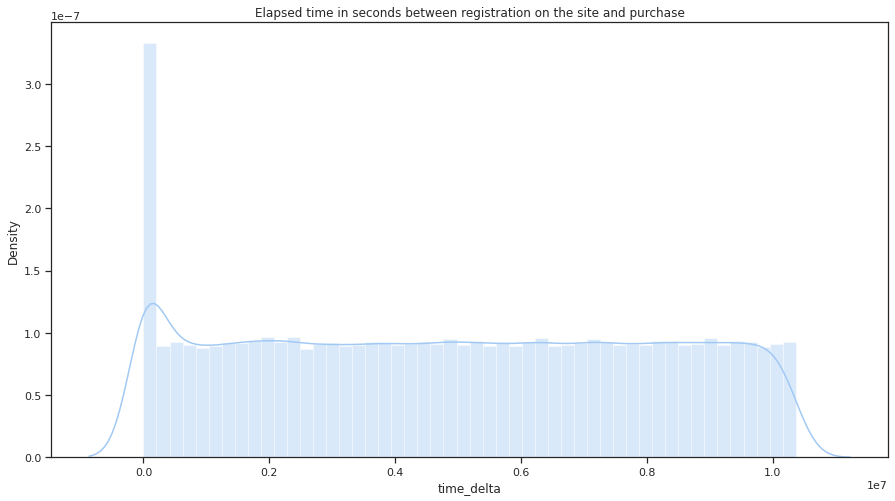

In [23]:
plt.figure(figsize=(15,8))
sns.distplot(X3['time_delta'])
plt.title("Elapsed time in seconds between registration on the site and purchase")
plt.show()

In [24]:
fraud_1s = X3['time_delta'][X3['time_delta'] == 1.000000e+00].count()
fraud_tot = len(X3.y)
fraud0 = float(X3[X3.y == 1].y.value_counts())
fraud1 = float(X3[X3.y == 0].y.value_counts())
bot_fraud = round(fraud_1s / fraud0 *100,2)


print(" {}% of frauds are carried out by 'bot' who carry out transactions in 1 second".format(bot_fraud))

 53.71% of frauds are carried out by 'bot' who carry out transactions in 1 second


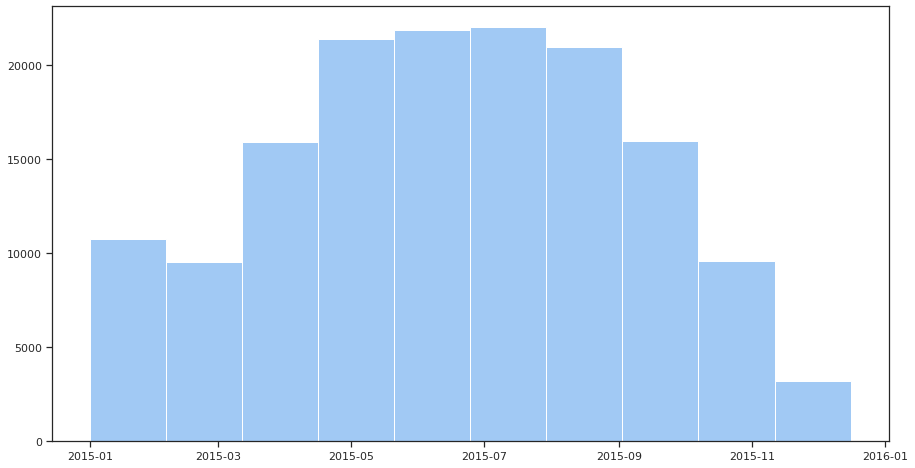

In [25]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize=(15,8))
fig = plt.hist(X3["purchase_time"])
plt.show()

No handles with labels found to put in legend.


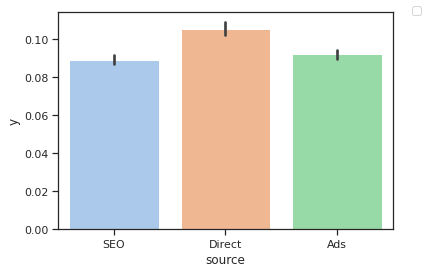

In [26]:
ax = sns.barplot(x="source", y="y", data=X3)
ax.legend(bbox_to_anchor=(1.1, 1.05))

No handles with labels found to put in legend.


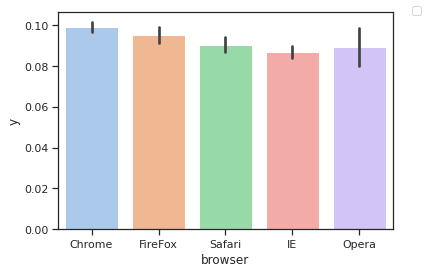

In [27]:
ax = sns.barplot(x="browser", y="y", data=X3)
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [28]:
fraud_pv = df1[['purchase_value', 'y']].groupby(['purchase_value', 'y'], as_index = False).size().unstack().fillna(0)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


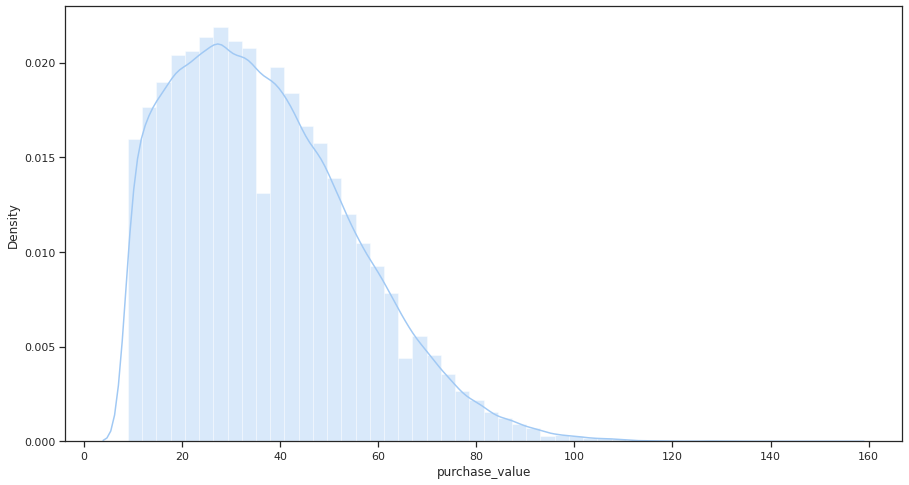

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sns.distplot(X3.purchase_value)

In [30]:
## Comment: skewed positive distribution

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


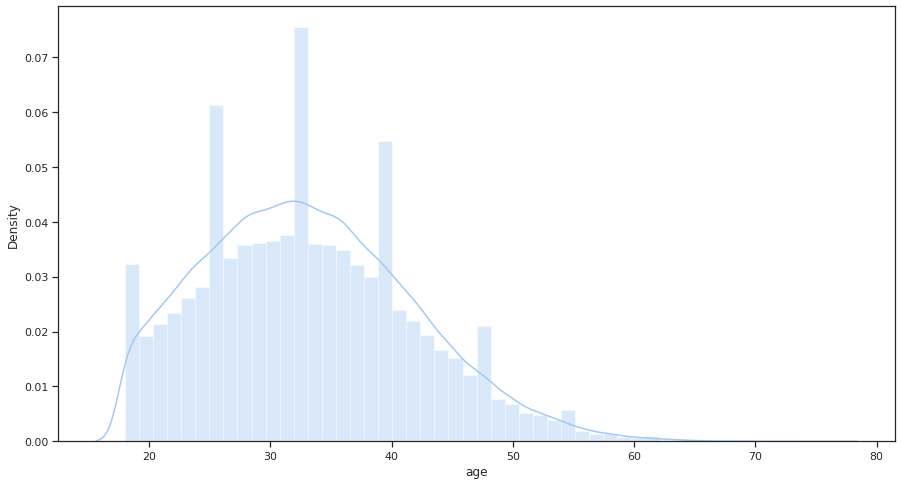

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sns.distplot(X3.age)

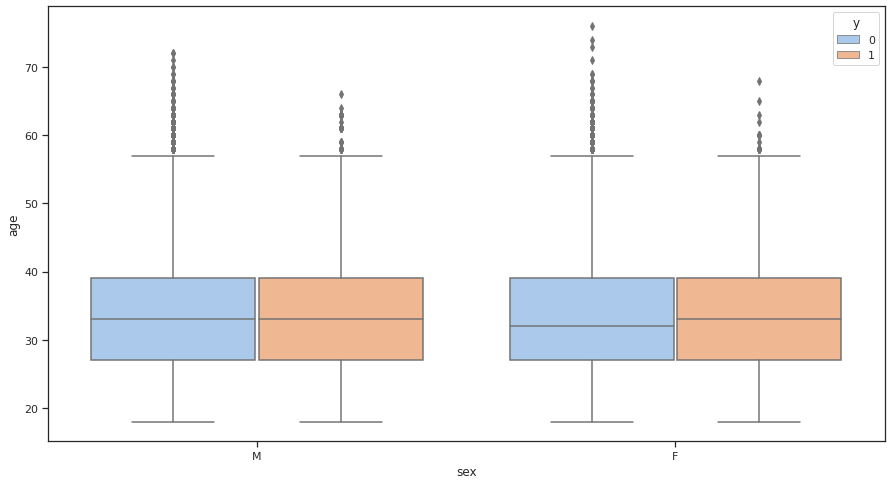

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sns.boxplot(x=X3.sex, y=X3.age, hue=X3.y)
# distribution age vs gender

In [33]:
X3

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,y,country,time_delta,0,1,total_purchases_per_country,%_Fraud_Country,country_cat
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,6591.0,715.0,7306.0,9.79,23
1,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2.521871e+09,0,Japan,5959702.0,6591.0,715.0,7306.0,9.79,23
2,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3.682312e+09,0,Japan,662649.0,6591.0,715.0,7306.0,9.79,23
3,28074,2015-07-03 09:31:29,2015-08-07 20:12:17,22,GQOICTLWVUQJR,Ads,Chrome,M,36,7.289345e+08,0,Japan,3062448.0,6591.0,715.0,7306.0,9.79,23
4,135536,2015-05-03 22:40:07,2015-07-18 15:43:38,32,ITRXCOXKEQTAM,SEO,FireFox,M,37,2.097968e+09,0,Japan,6541411.0,6591.0,715.0,7306.0,9.79,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,40206,2015-02-19 20:21:17,2015-04-04 02:46:18,26,CIWJPLNHZBBDV,SEO,IE,F,23,3.277722e+09,0,Yemen,3738301.0,1.0,0.0,1.0,0.00,0
151108,369153,2015-01-26 19:36:24,2015-02-03 02:14:54,12,ALALTFKYSIFXH,Ads,Chrome,M,34,1.505370e+09,0,San Marino,628710.0,1.0,0.0,1.0,0.00,0
151109,209282,2015-03-27 22:02:49,2015-06-03 05:25:51,18,KUZBDYGURFVSN,Ads,FireFox,F,24,3.314912e+09,0,Burundi,5815382.0,1.0,0.0,1.0,0.00,0
151110,193457,2015-05-02 15:27:48,2015-05-14 20:59:33,45,UZBDAROVIEOPM,SEO,FireFox,M,30,3.412259e+09,0,Nauru,1056705.0,1.0,0.0,1.0,0.00,0


## Preprocessing

In [34]:
X4 = X3.loc[:,["purchase_value", "source", "browser", "sex", "age", "time_delta", "%_Fraud_Country"]]
y4 = X3.loc[:, "y"]

### Encoding the cathegorical variables

In [35]:
X4_cat = pd.get_dummies(X4.loc[:,["source", "browser", "sex"]])
X4_num = X4.loc[:,["purchase_value", "age", "time_delta", "%_Fraud_Country"]]

### Train/test data split 

In [36]:
from sklearn.model_selection import train_test_split
X4_cat_train, X4_cat_test, X4_num_train, X4_num_test, y4_train, y4_test = train_test_split(X4_cat, X4_num, y4, stratify=y4, test_size=0.3, random_state = 42)

# Normalization

In [37]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

X4_num_train = pd.DataFrame(sc_x.fit_transform(X4_num_train), columns=X4_num_train.columns, index = X4_num_train.index)
X4_num_test = pd.DataFrame(sc_x.transform(X4_num_test),columns=X4_num_test.columns, index = X4_num_test.index)

X4_train = pd.merge(X4_cat_train, X4_num_train, left_index=True, right_index=True)
X4_test = pd.merge(X4_cat_test, X4_num_test, left_index=True, right_index=True)


In [38]:
X4_train.head()

,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,purchase_value,age,time_delta,%_Fraud_Country
61243,0,0,1,0,1,0,0,0,0,1,0.715925,-0.017566,-0.660573,0.090096
141795,0,0,1,0,1,0,0,0,0,1,0.934414,0.795170,-0.905383,1.721420
84430,0,0,1,0,0,0,0,1,1,0,-1.414342,0.330749,-1.377888,-0.359768
115771,0,1,0,0,0,1,0,0,0,1,-0.267275,0.911276,0.960816,-0.986851
62042,0,1,0,1,0,0,0,0,1,0,-0.158031,0.214644,-0.174742,0.090096


In [39]:
from sklearn.preprocessing import KBinsDiscretizer # Bin continuous data into intervals.


kb = KBinsDiscretizer(10)
X4_train_discrete = pd.DataFrame(kb.fit_transform(X4_train).toarray())
X4_test_discrete = pd.DataFrame(kb.transform(X4_test).toarray())

X4_train_discrete = pd.get_dummies(X4_train_discrete)
X4_test_discrete = pd.get_dummies(X4_test_discrete)

X4_train_discrete.head()

/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreas

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Naive Bayes classifier

In [40]:
from sklearn.naive_bayes import BernoulliNB # discrete Naive bayes model
classifier = BernoulliNB()
classifier.fit(X4_train_discrete, y4_train)

BernoulliNB()

In [41]:
classifier.score(X4_test_discrete, y4_test)

0.911523359950589

In [42]:
## Comment: high acceptable score for an unbalanced data set

In [43]:
y4_pred = classifier.predict(X4_test_discrete)
y4_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
#### Confusion matrix for the NB Bernoulli model

<AxesSubplot:>

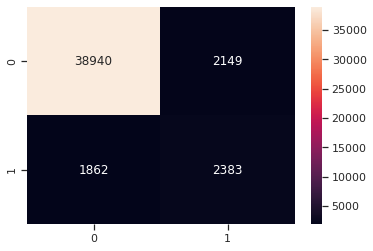

In [45]:
# Matrice du confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y4_test, y4_pred) 
sns.heatmap(cm, annot=True, fmt='d')

In [46]:
print("The Naive Bayes model predicts a rate of fraud of {} %".format(round((cm[1,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[1,0]+cm[0,1])*100,2)))
print("Comment: the registered (empirical) rate of fraud is 9.4 %")

print("The false negative rate is {} %".format(round(cm[1,0]/(cm[0,0]+cm[1,1]+cm[1,0]+cm[0,1])*100,2)))
print("The false positive rate is {} %".format(round(cm[0,1]/(cm[0,0]+cm[1,1]+cm[1,0]+cm[0,1])*100,2)))

The Naive Bayes model predicts a rate of fraud of 9.36 %
Comment: the registered (empirical) rate of fraud is 9.4 %
The false negative rate is 4.11 %
The false positive rate is 4.74 %


#### Accuracy of the model (75%)

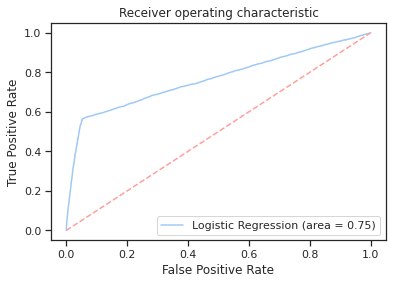

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc1 = roc_auc_score(y4_test, y4_pred)
fpr, tpr, thresholds = roc_curve(y4_test, classifier.predict_proba(X4_test_discrete)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Feature importance: 
time_delta of the purchases, the country with higher fraud percentages, the source and the browser from the purchase and age are the most important variables according to the NAive Bayes model to understand and predict fraud probabilities


In [48]:
######## X_cat/X_numbefore normalisation #################
X4_cat2 = pd.get_dummies(X4.loc[:,["source", "browser", "sex"]], drop_first=True)
X5 = pd.merge(X4_cat2, X4_num, left_index=True, right_index=True)


from sklearn.feature_selection import chi2
feature_importance = chi2(X5, y4)

feature_ranking = pd.DataFrame(columns=X5.columns, data=feature_importance, index=["Chi2 Score", "P-value"]).transpose()
feature_ranking.sort_values("Chi2 Score", ascending=False)

,Chi2 Score,P-value
time_delta,1.991514e+10,0.000000e+00
%_Fraud_Country,4.487578e+02,1.344199e-99
source_Direct,4.958058e+01,1.903890e-12
browser_IE,2.042492e+01,6.201705e-06
age,1.485610e+01,1.160322e-04
source_SEO,1.358172e+01,2.283994e-04
sex_M,3.665302e+00,5.555658e-02
browser_Safari,3.447699e+00,6.333989e-02
purchase_value,1.404002e+00,2.360546e-01
browser_Opera,8.454928e-01,3.578305e-01


## Detecting fraud with support vector machines

In [49]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X4_train, y4_train)

SVC()

In [50]:
classifier.score(X4_test, y4_test)

0.931111307186659

In [51]:
## Comment: higher score than NB BernoullI

In [52]:
y4_pred = classifier.predict(X4_test)
y4_pred

array([0, 0, 0, ..., 0, 0, 0])

## Hyper parameter tuning

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid_search = GridSearchCV(classifier, param_grid, verbose=2, n_jobs=-1)

grid_search.fit(X4_train, y4_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 159.7min finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=2)

In [54]:
print(grid_search.best_params_)

{'C': 50, 'gamma': 0.005}


In [55]:
best_model = grid_search.best_estimator_
print("Score on the train set :", best_model.score(X4_train,y4_train))
print("Score on the test set :", best_model.score(X4_test,y4_test))

Score on the train set : 0.9071356992947494
Score on the test set : 0.9073101866149027
